## **Problem 1 : Analysis of Numeric Variables**
In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.
['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']<br>

a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?<br>
Ans: LotArea, 69<br>

b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?<br>
Ans: LotArea, the skew is positive<br>

c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.<br>
Ans: GrLivArea and GarageArea. This is because both variable has a high correlation coefficient with SalePrice.



In [8]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [9]:
train = pd.read_csv(r"C:\Users\paier\OneDrive\Desktop\SC1015 DSAI\Exercise 3\train.csv")
train_data = pd.DataFrame(train[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']])
train_data

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8450,1710,856,548
1,9600,1262,1262,460
2,11250,1786,920,608
3,9550,1717,756,642
4,14260,2198,1145,836
...,...,...,...,...
1455,7917,1647,953,460
1456,13175,2073,1542,500
1457,9042,2340,1152,252
1458,9717,1078,1078,240


             LotArea    GrLivArea  TotalBsmtSF   GarageArea
count    1460.000000  1460.000000  1460.000000  1460.000000
mean    10516.828082  1515.463699  1057.429452   472.980137
std      9981.264932   525.480383   438.705324   213.804841
min      1300.000000   334.000000     0.000000     0.000000
25%      7553.500000  1129.500000   795.750000   334.500000
50%      9478.500000  1464.000000   991.500000   480.000000
75%     11601.500000  1776.750000  1298.250000   576.000000
max    215245.000000  5642.000000  6110.000000  1418.000000 

The number of outliers of LotArea is 69
The number of outliers of GrLivArea is 31
The number of outliers of TotalBsmtSF is 61
The number of outliers of GarageArea is 21


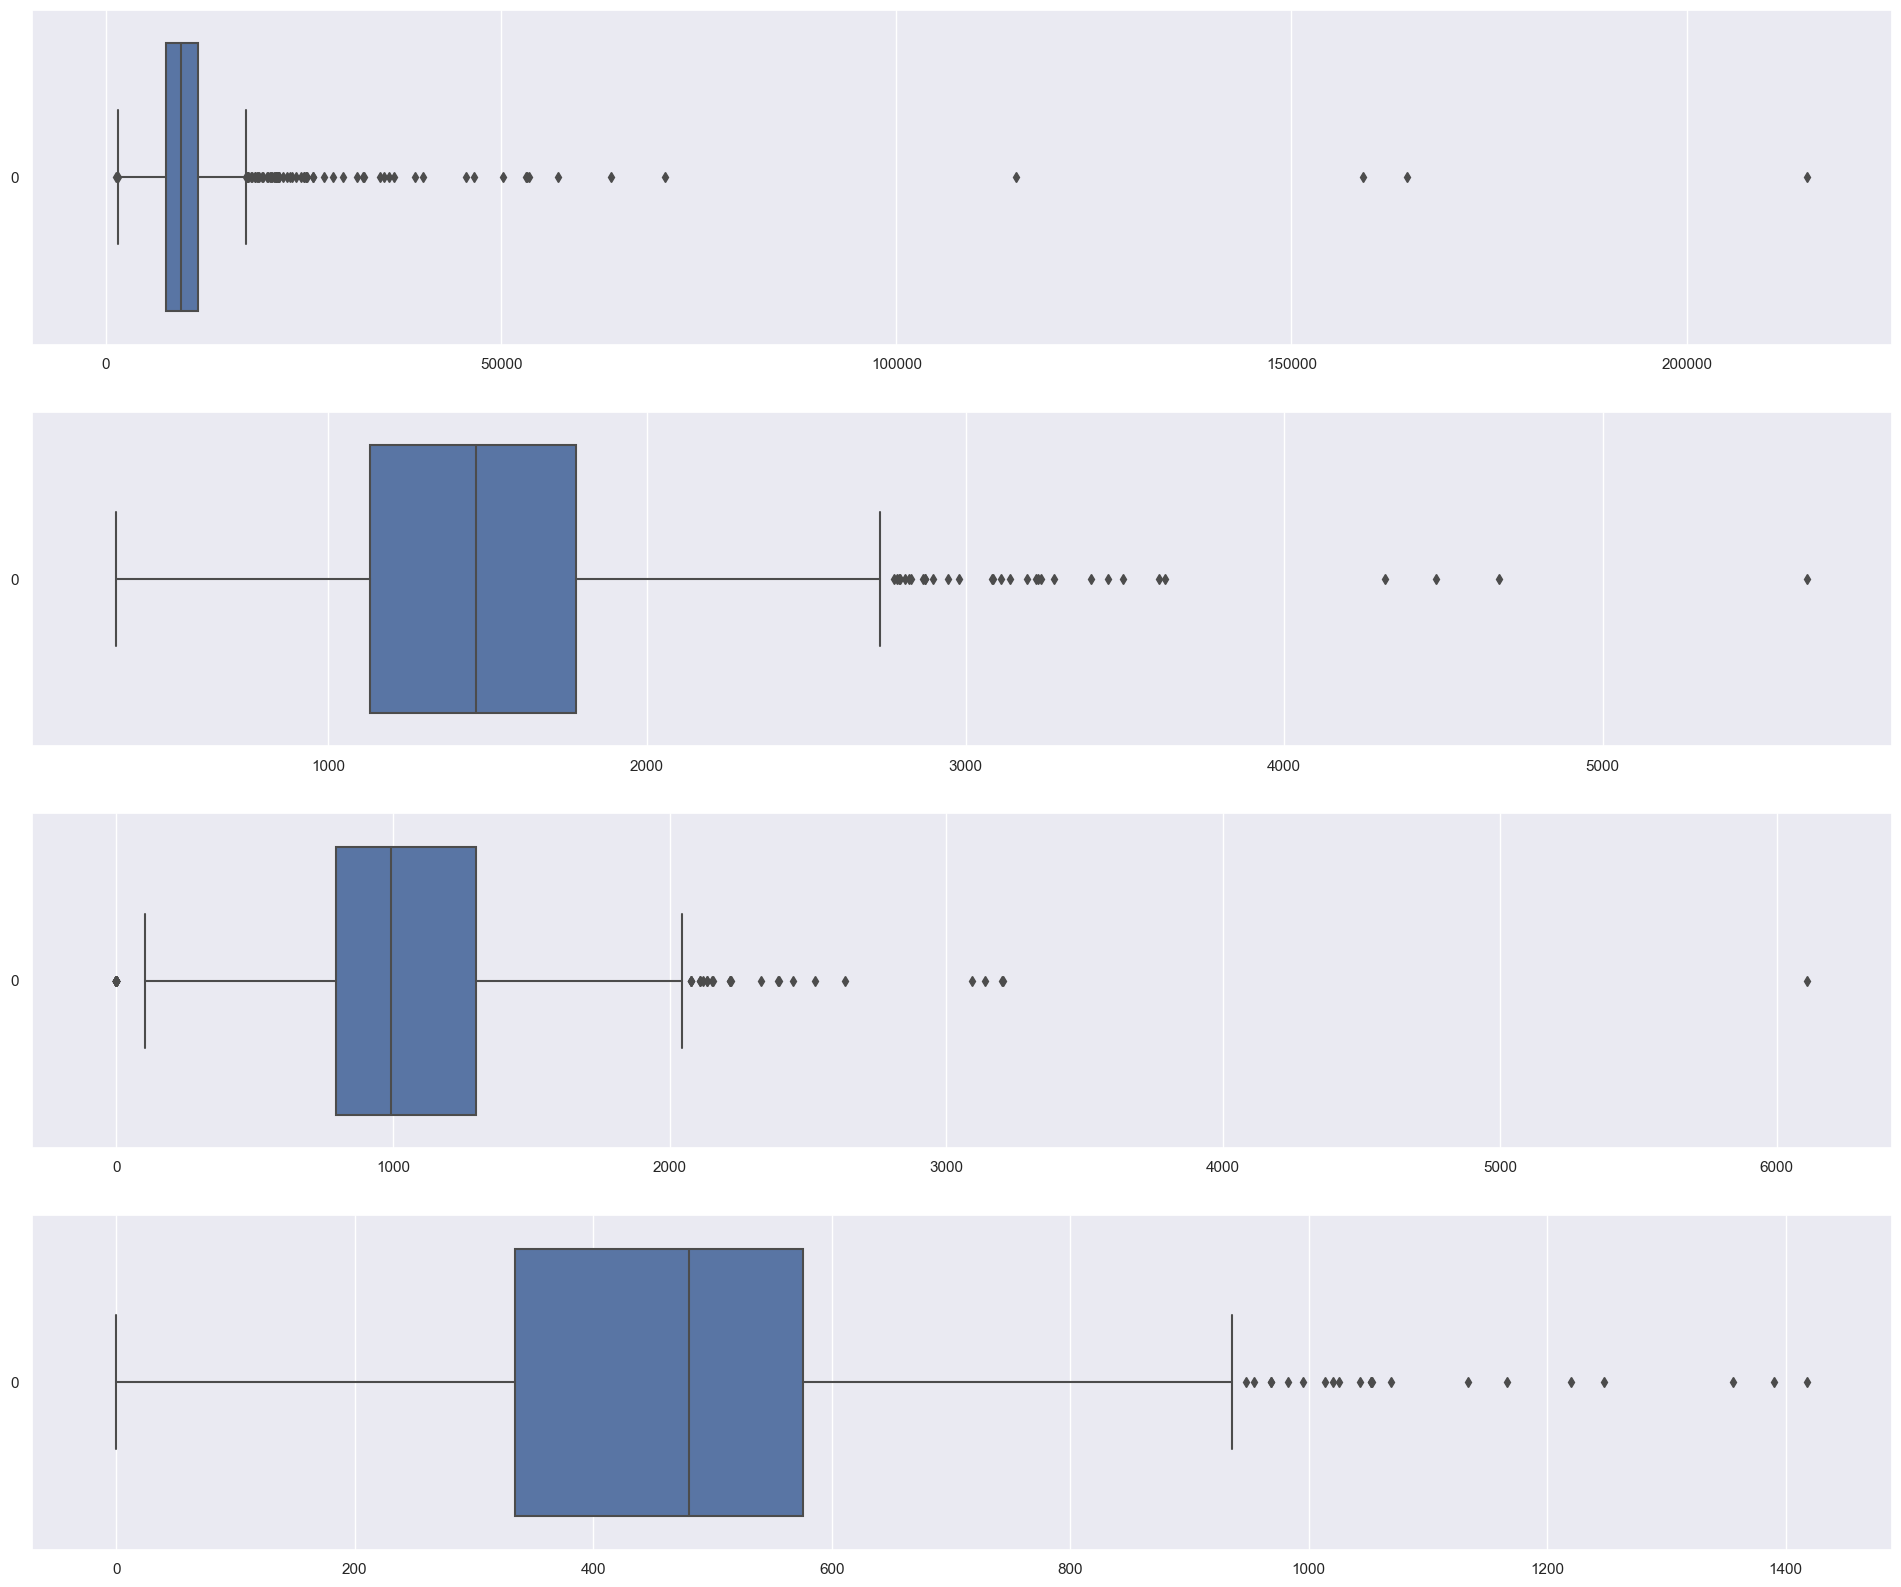

In [10]:
#Problem 1a
f, axes = plt.subplots(4, 1, figsize = (24,20))
counter = 0
for td in train_data:
    sb.boxplot(data = train_data[td], orient = 'h', ax = axes[counter])
    counter += 1
    
#firstly we generate all the data out
    
print(train_data.describe(), "\n")

#looking for each Q1 and Q3

Q1 = [7553.5, 1129.5, 795.75, 334.5]
Q3 = [11601.5, 1776.75, 1298.25, 576]

i = 0

for td in train_data:
    holder = 0
    IQR = Q3[i] - Q1[i]
    for datas in train_data[td]:
        if datas < Q1[i] - 1.5*IQR or datas > Q3[i] + 1.5*IQR:
            holder += 1
    i += 1
    print("The number of outliers of", td, "is", holder)
    
#after actual counting the number of outliers for each variable, we know that the variable which has the maximum number of 
#outlier is 69

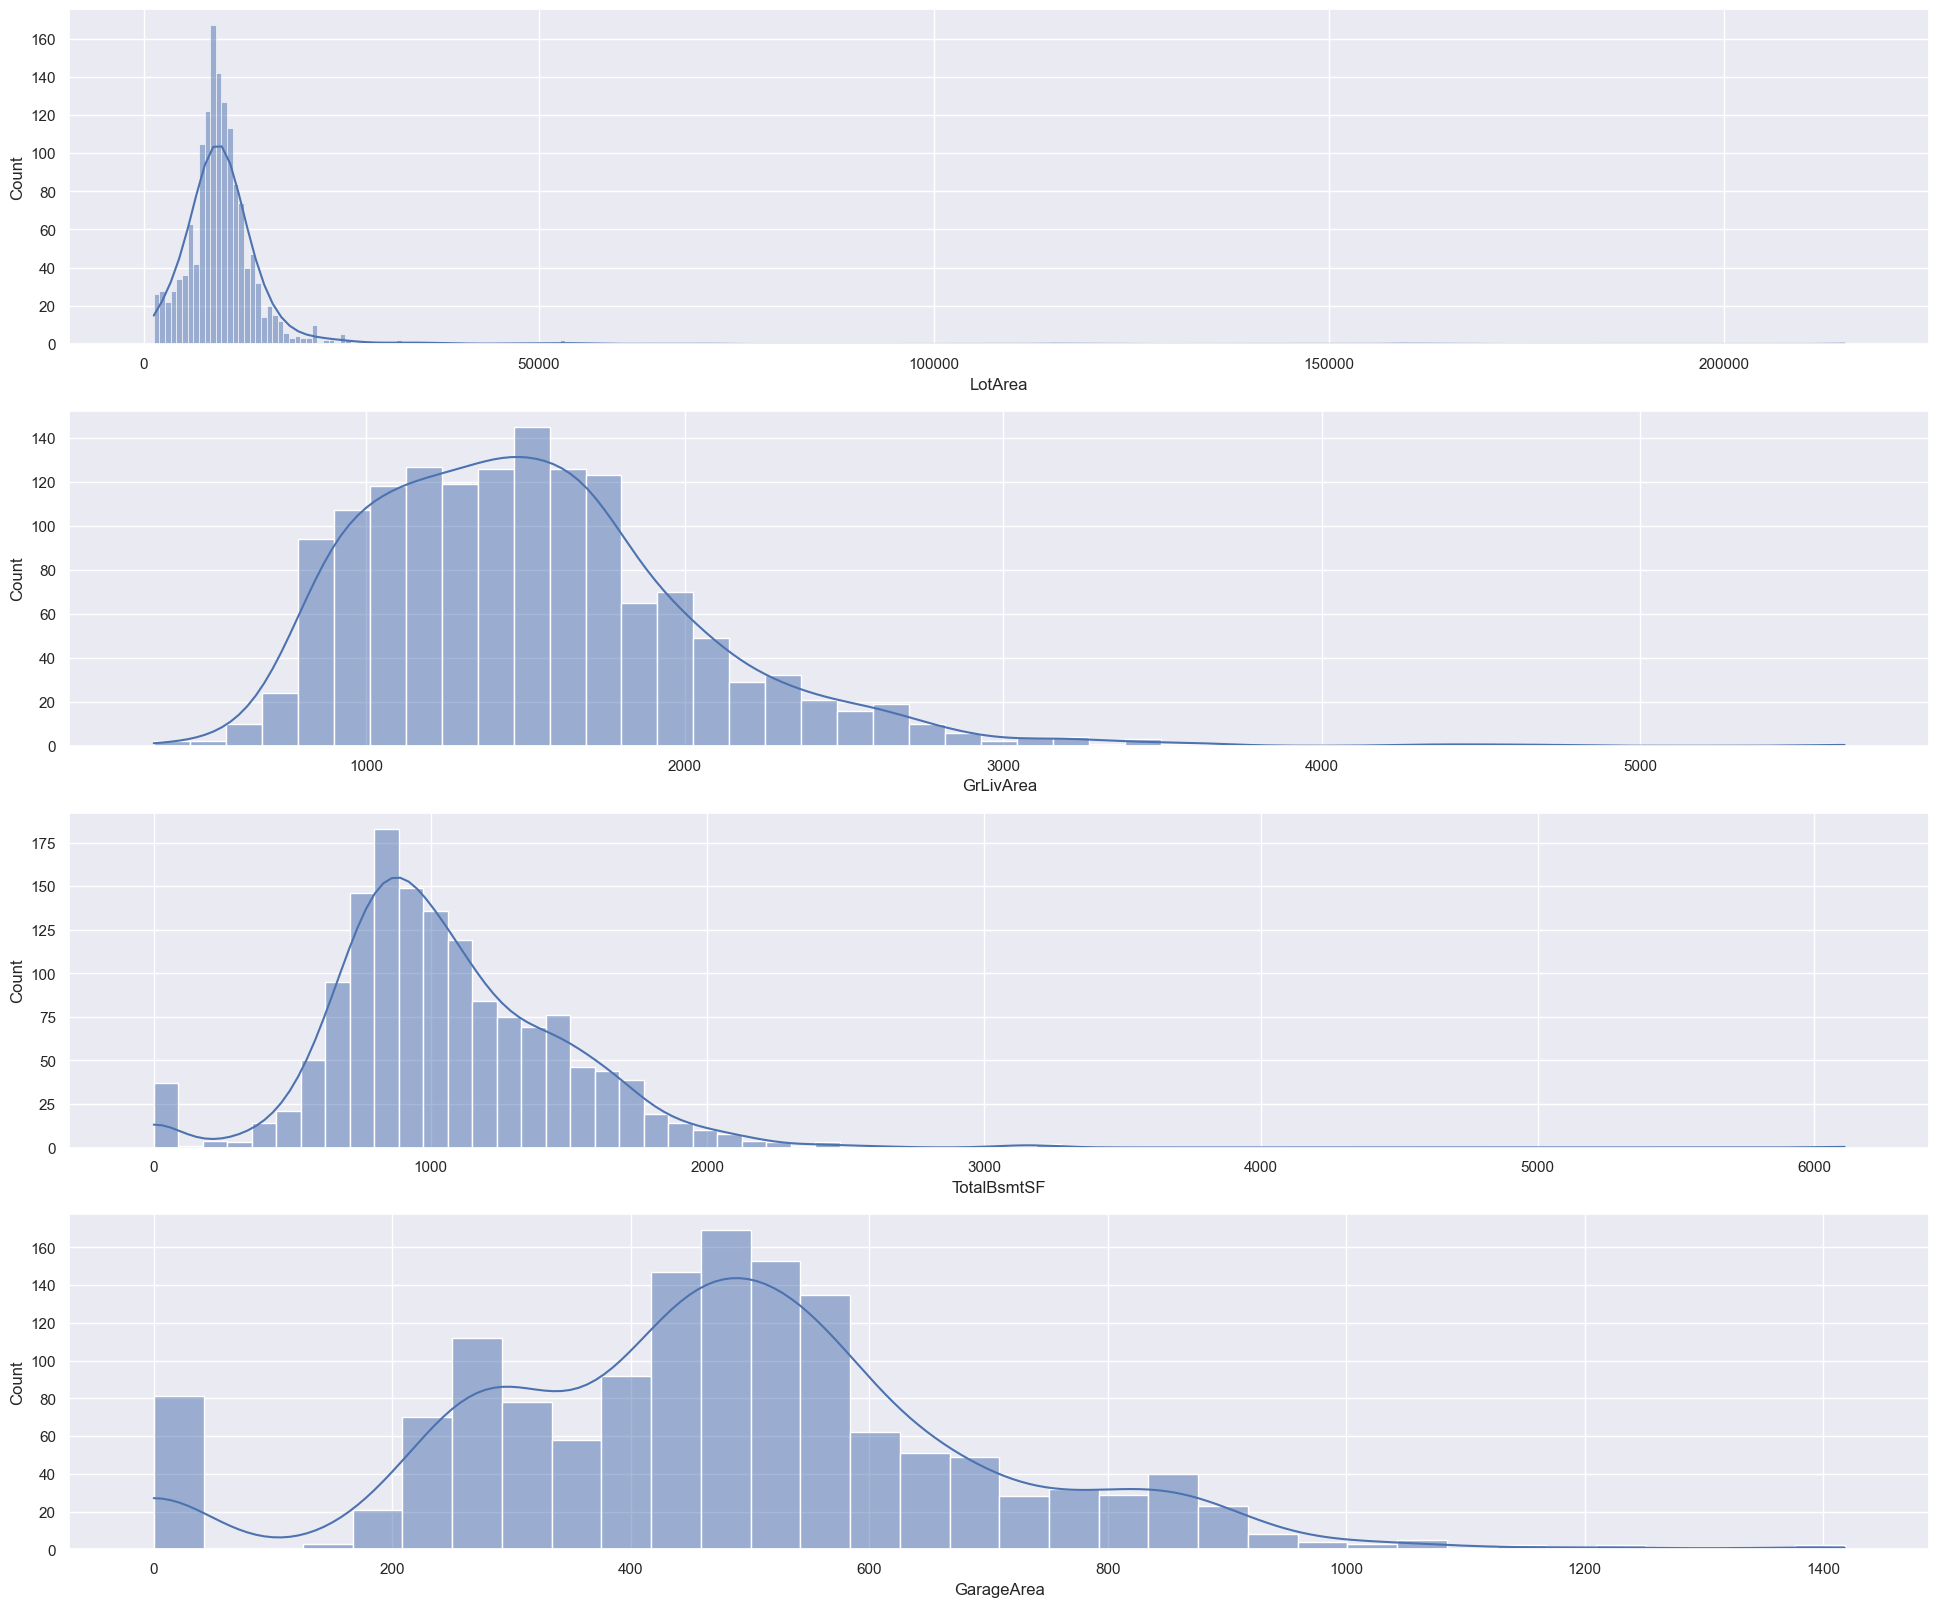

In [11]:
#problem 1b
#we solve this question by drawing each histogram first
f, axes = plt.subplots(4, 1, figsize = (24,20))
counter = 0
for td in train_data:
    sb.histplot(data = train_data[td], kde = True, ax = axes[counter])
    counter += 1
    
#from all the histograms, we know that the variables whichi skewed the most is Lotarea and it skewed positively

In [12]:
#problem 1c
#firstly we extract the saleprice first and adding it into the train data
sp = pd.DataFrame(train['SalePrice'])
train_data['SalePrice'] = sp

#then we draw the heatmap
train_data.corr()

#from the correlation coeffient of each variable with Saleprice, the GarageArea and the GrLivArea can help us the most in predicting
#'Saleprice' of houses in this data because they have the lowest and highest index respectively which show they have strong relation
#with 'SalePrice'


,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


## **Problem 2 : Analysis of Categorical Variables**
In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.<br>
['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']<br>

a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses? <br>
Ans: Neighborhood, NAmes<br>

b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.<br>
Ans: OverallQual and Neighborhood. This is because both variables effect the median of the SalePrice for each catergory.


In [56]:
#problem 2a
#firstly we extract the data first
data_2 = pd.DataFrame(train[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

for datas in data_2:
    print("The number of houses of", datas, "is", len(data_2[datas].unique()), '\n')

#So the variables 'Neighborhood' has the highest level of number
for datas in data_2:
    print("The highest number of houses of", datas, "is" , max(data_2[datas].value_counts()), "\n")

#NAmes has the highest number of houses


The number of houses of MSSubClass is 15 

The number of houses of Neighborhood is 25 

The number of houses of BldgType is 5 

The number of houses of OverallQual is 10 

The highest number of houses of MSSubClass is 536 

The highest number of houses of Neighborhood is 225 

The highest number of houses of BldgType is 1220 

The highest number of houses of OverallQual is 397 



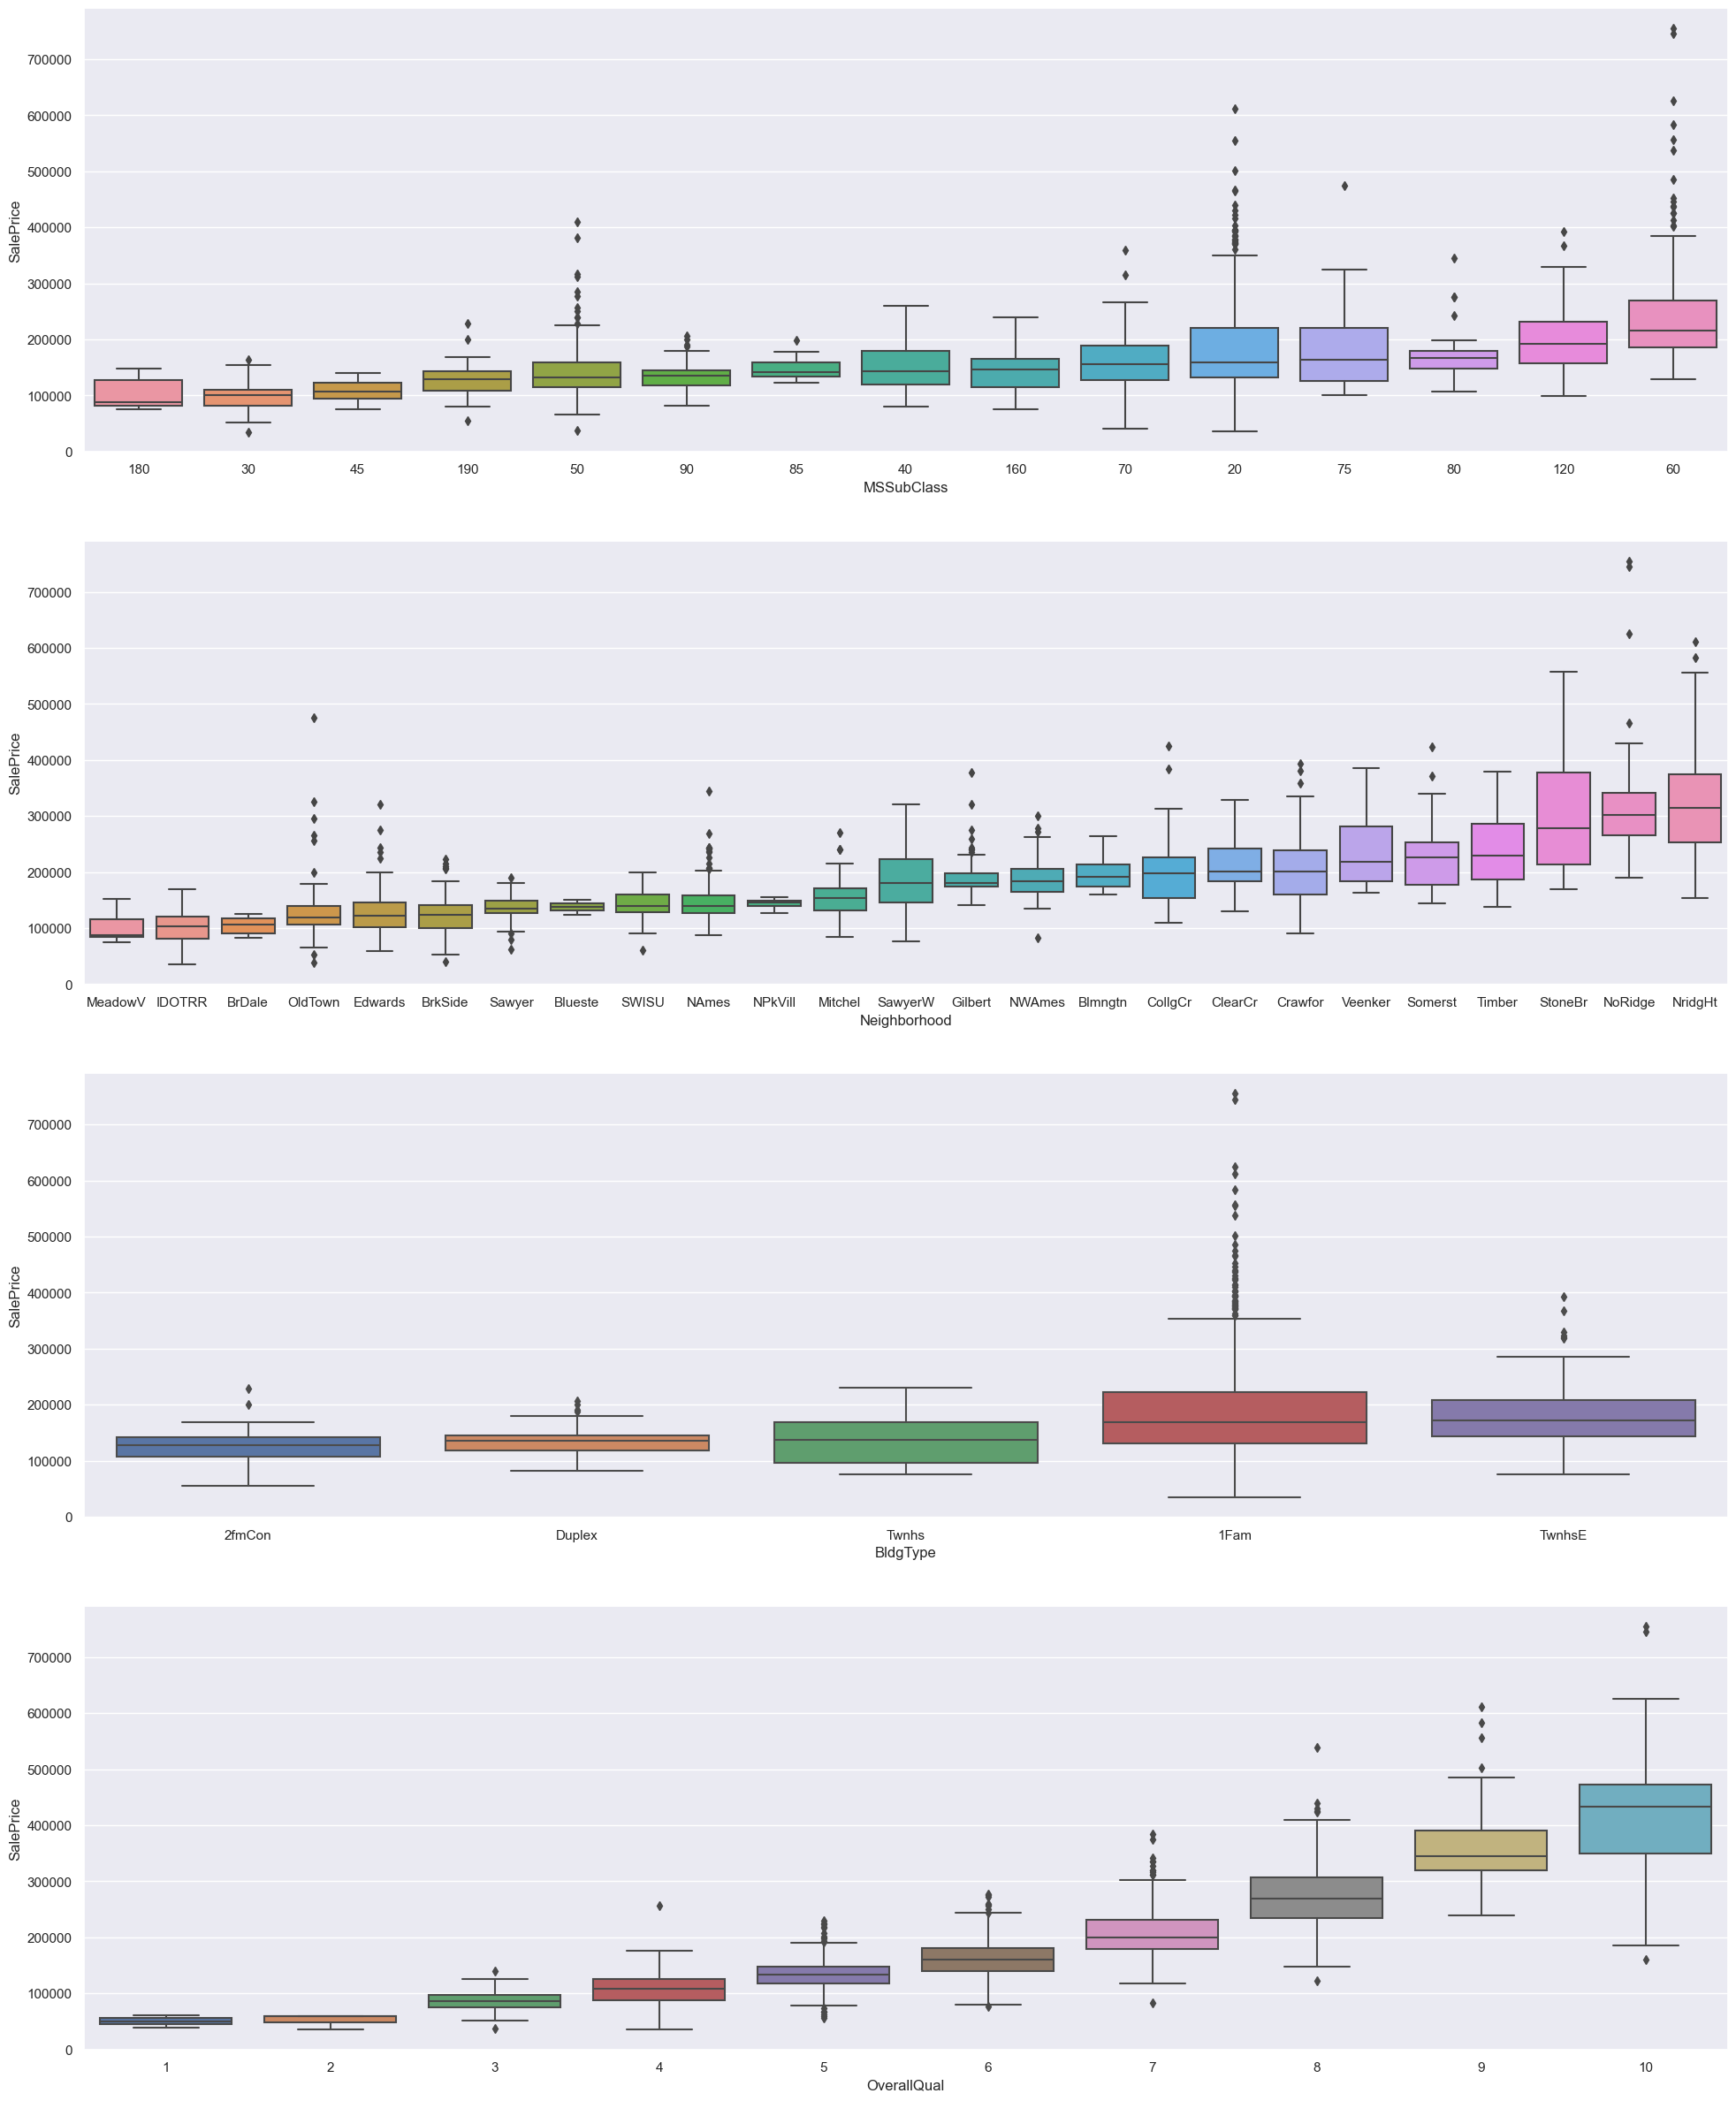

In [58]:
#problem 2b
f, axes = plt.subplots(4, 1, figsize=(24,30))
counter = 0

for datas in data_2:

    sb.boxplot(data = train, x = train[datas], y = 'SalePrice', ax = axes[counter], order = train.groupby(by=[datas])['SalePrice'].median().sort_values().index)
    counter += 1
    
#from the joinplot, I think the variables 'OverallQual' and 'Neighborhood' will help the most when predicting the 'SalePrice'

## **Problem 3 : Interesting Questions for EDA**<br>
Choose any ONE of the following questions to answer. You may always try out the other one at home if you want. <br>

b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.<br>
Ans: The SalePrice of a house get affeccted only when the year is apporaching toward 2010. It gets higher due to the year of remodeled increasing. However, for the year before 2000, it does not show any effects of the remodeled year to the SalePrice of the house. In conclusion, the remodeled year only affect the SalePrice after 2000.


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

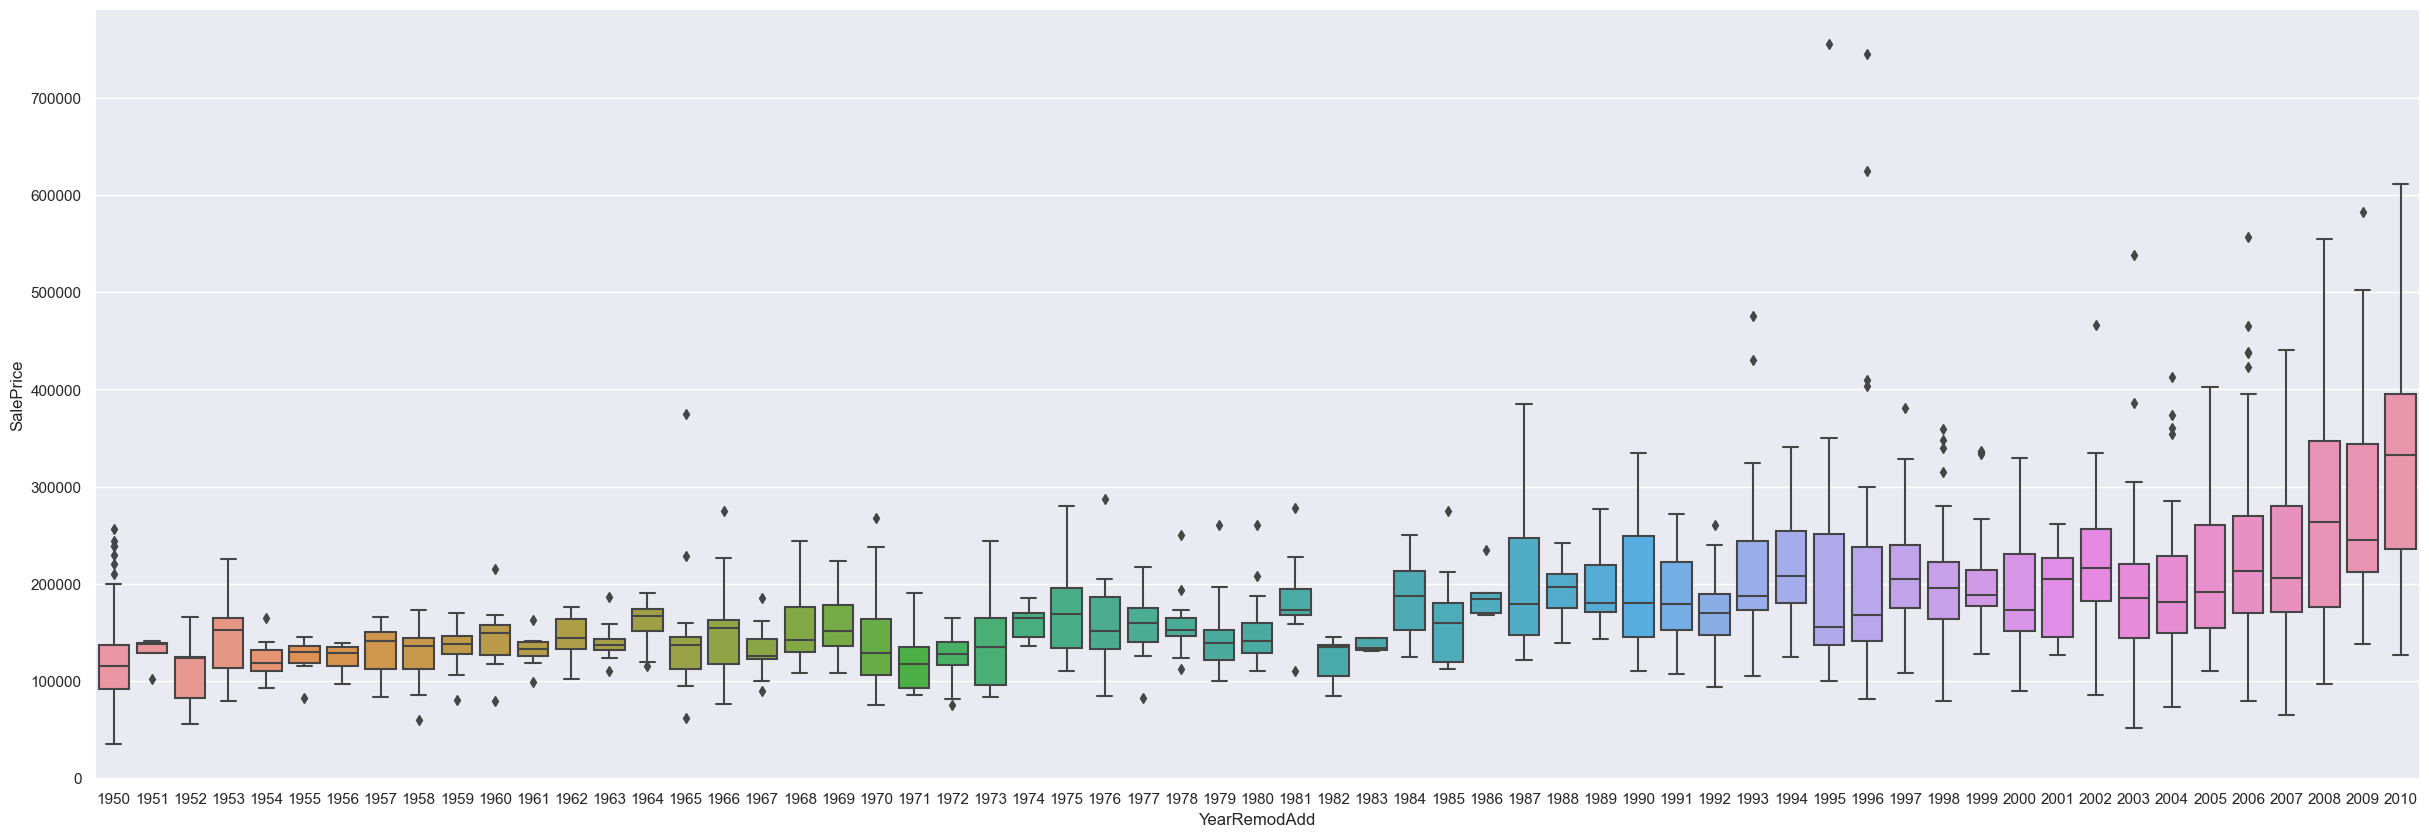

In [53]:
#problem 3
f = plt.figure(figsize = (30, 10))
year = pd.DataFrame(train[['SalePrice', 'YearBuilt', 'YearRemodAdd']])
sb.boxplot(data = year, x = 'YearRemodAdd', y = 'SalePrice')